# Importing Dataset

In [15]:
import pandas as pd
df=pd.read_csv('housing.csv')

Viewing the data

In [16]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


Dividing the data into train and test

In [17]:
x=df[["RM","LSTAT","PTRATIO"]]
y=df["MEDV"]

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,shuffle=True)

Defining the accuracy function

In [65]:
def accuracy(y_pred,y_test):
    from sklearn import metrics
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    print("MAE",metrics.mean_absolute_error(y_test,y_pred))
    print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))    # using heatmap to plot accuracy
    plt.scatter(y_test,y_pred)
    plt.xlabel('predicted values')
    plt.ylabel('true values')
    plt.show()

1) Using Random Forest Regressor

In [60]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=200,min_samples_split=2,min_samples_leaf=2,max_features='sqrt', max_depth=80, bootstrap=True)
regressor.fit(x_train,y_train)
y_pred_randf=regressor.predict(x_test)

2) Using Decission Tree Regressor

In [68]:
from sklearn.tree import DecisionTreeRegressor
regr=DecisionTreeRegressor(max_depth=4)
regr.fit(x_train,y_train)
y_pred_dectree=regr.predict(x_test)

3) Using ADA Boost Regressor

In [84]:
from sklearn.ensemble import AdaBoostRegressor
regr=AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=291)
regr.fit(x_train,y_train)
y_pred_adaboost=regr.predict(x_test)

4) Using Ridge Regressor

In [71]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=50)
rr.fit(x_train,y_train)
y_pred_ridge=rr.predict(x_test)

5) Using SGD Regressor

In [72]:
from sklearn.linear_model import SGDRegressor
clf=SGDRegressor(max_iter=1000,tol=1e-3)
clf.fit(x,y)
y_pred_sgd=clf.predict(x_test)

6) Using Support Vector Regression

In [73]:
from sklearn import svm
clf = svm.SVR(kernel='rbf')
clf.fit(x,y)
y_pred_svr=clf.predict(x_test)

C:\Users\Juhi Kamdar\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


7) Using ARDRegression

In [75]:
from sklearn.linear_model import ARDRegression
#ARD Regression
clf=ARDRegression() 
clf.fit(x_train,y_train)
y_pred_ard=clf.predict(x_test)

Finding Accuracy of all the methods

Random Forest
MAE 50907.18347947076
RMSE 68847.43467094853


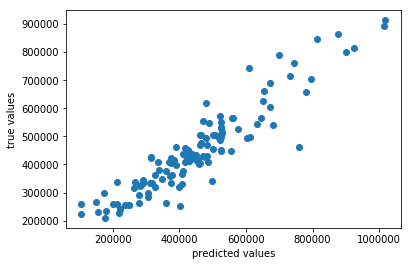

Decision Tree
MAE 57748.59342847773
RMSE 77087.97717051746


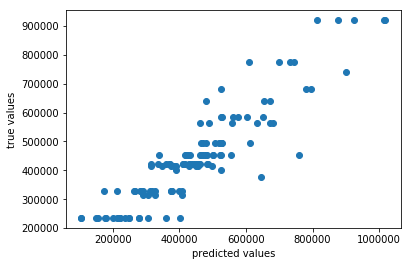

ADABoost Regressor
MAE 56135.67631738186
RMSE 75839.1682845142


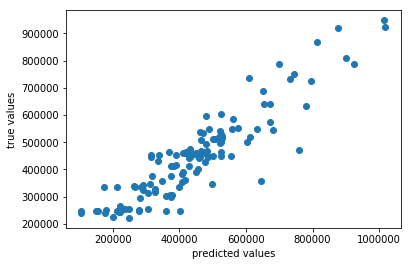

Ridge Regression
MAE 67791.25023711707
RMSE 93175.5297054571


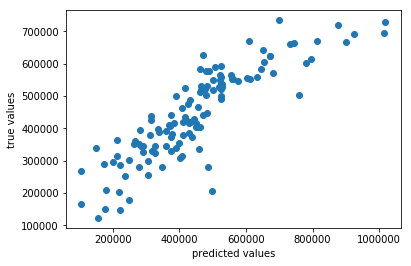

SGD Regression
MAE 41121316.006771065
RMSE 53833629.02906475


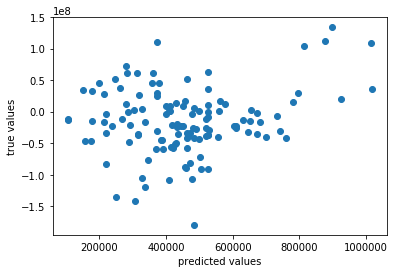

SVR Regression
MAE 135716.73611598078
RMSE 181792.16090943126


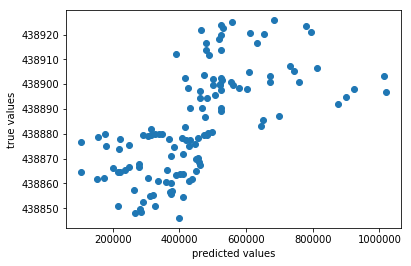

ARD Regression
MAE 67491.70787924147
RMSE 92164.05770004926


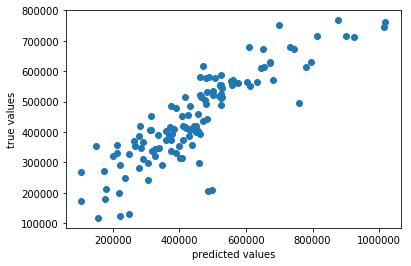

In [85]:
print("Random Forest")
accuracy(y_pred_randf,y_test)
print("Decision Tree")
accuracy(y_pred_dectree,y_test)
print("ADABoost Regressor")
accuracy(y_pred_adaboost,y_test)
print("Ridge Regression")
accuracy(y_pred_ridge,y_test)
print("SGD Regression")
accuracy(y_pred_sgd,y_test)
print("SVR Regression")
accuracy(y_pred_svr,y_test)
print("ARD Regression")
accuracy(y_pred_ard,y_test)